In [6]:
%load_ext autoreload
%autoreload 2

# Get parent directory and add to sys.path
import os
import sys

parent_dir = os.path.dirname(os.getcwd())
sys.path.append(parent_dir)

# Require ipympl
%matplotlib widget 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
# MPC import
import numpy as np
from LinearMPC_template.MPCVelControl import MPCVelControl
from src.rocket import Rocket
from src.vel_rocket_vis import RocketVis

rocket_obj_path = os.path.join(parent_dir, "Cartoon_rocket.obj")
rocket_params_path = os.path.join(parent_dir, "rocket.yaml")

In [ ]:
Ts = 0.05
sim_time = 4
H = 5

# [w_x, w_y, w_z, alpha, beta, gamma, v_x, v_y, v_z, x, y, z]

# Test Case 1: Velocity Perturbation (Start at 5 m/s in X)
x0_x = np.array([0., 0., 0.,    # Angular velocity (rad/s)
                 0., 0., 0.,    # Euler angles (rad)
                 5., 0., 0.,    # Velocity (m/s) <--- v_x = 5
                 0., 0., 0.])   # Position (m)

# Test Case 2: Roll Perturbation (Start at 30 degrees roll)
x0_roll = np.array([0., 0., 0.,
                    0., 0., np.deg2rad(30), # Gamma = 30 deg
                    0., 0., 0.,
                    0., 0., 0.])

# Test Case 3: Combined (5 m/s in all axes)
x0_all = np.array([0., 0., 0.,
                   0., 0., 0.,
                   5., 5., 5.,  # v_x, v_y, v_z = 5
                   0., 0., 0.])

rocket = Rocket(Ts=Ts, model_params_filepath=rocket_params_path)
mpc = MPCVelControl().new_controller(rocket, Ts, H)

t_cl, x_cl, u_cl, t_ol, x_ol, u_ol, _ = rocket.simulate_control(
    mpc, sim_time, H, x0_x, method="linear"
)

vis = RocketVis(rocket, rocket_obj_path)
vis.anim_rate = 1.0
vis.animate(t_cl[:-1], x_cl[:, :-1], u_cl, T_ol=t_ol[..., :-1], X_ol=x_ol, U_ol=u_ol)
#vis.animate(t_ol[:-1], x_ol[:, :-1], u_ol);

c:\Users\Vince\anaconda3\envs\mpc2025\Lib\site-packages\cvxpy\problems\problem.py:1539: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Maximum invariant set successfully computed after 14 iterations.
Maximum invariant set successfully computed after 9 iterations.
Maximum invariant set successfully computed after 1 iterations.
Simulating time 0.00: 
Simulating time 0.05: 
Simulating time 0.10: 
Simulating time 0.15: 
Simulating time 0.20: 
Simulating time 0.25: 
Simulating time 0.30: 
Simulating time 0.35: 
Simulating time 0.40: 
Simulating time 0.45: 
Simulating time 0.50: 
Simulating time 0.55: 
Simulating time 0.60: 
Simulating time 0.65: 
Simulating time 0.70: 
Simulating time 0.75: 
Simulating time 0.80: 
Simulating time 0.85: 
Simulating time 0.90: 
Simulating time 0.95: 
Simulating time 1.00: 
Simulating time 1.05: 
Simulating time 1.10: 
Simulating time 1.15: 
Simulating time 1.20: 
Simulating time 1.25: 
Simulating time 1.30: 
Simulating time 1.35: 
Simulating time 1.40: 
Simulating time 1.45: 
Simulating time 1.50: 
Simulating time 1.55: 
Simulating time 1.60: 
Simulating time 1.65: 
Simulating time 1.70: 
Si

ValueError: x has 81 columns but y has 80 columns

Showing X Controller Invariant Set:


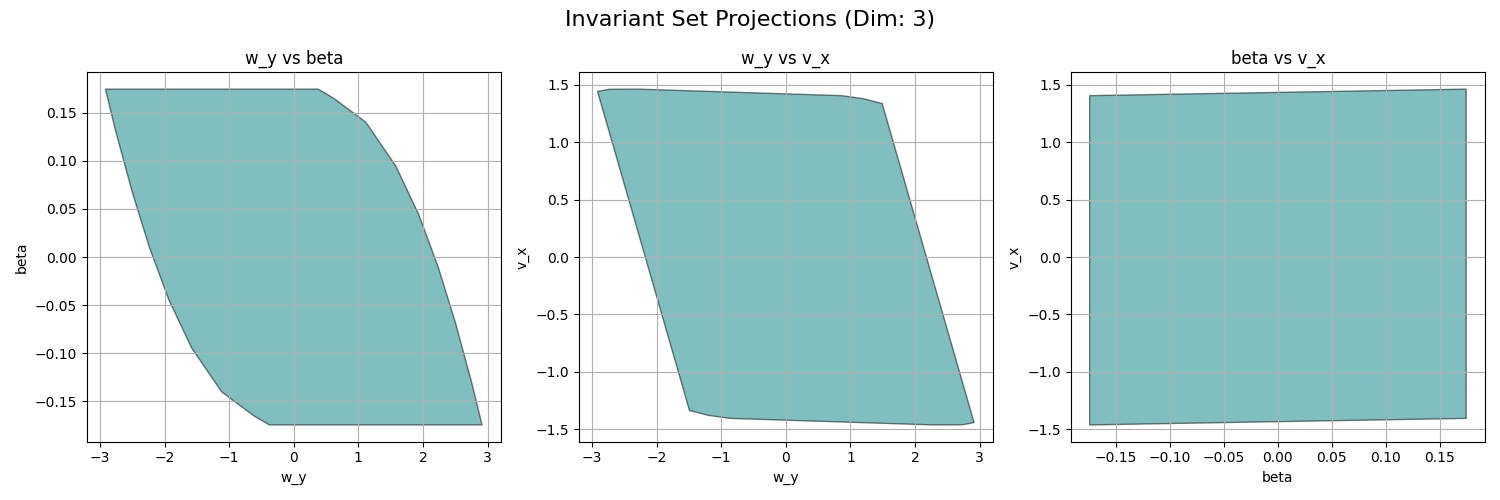


Showing Y Controller Invariant Set:


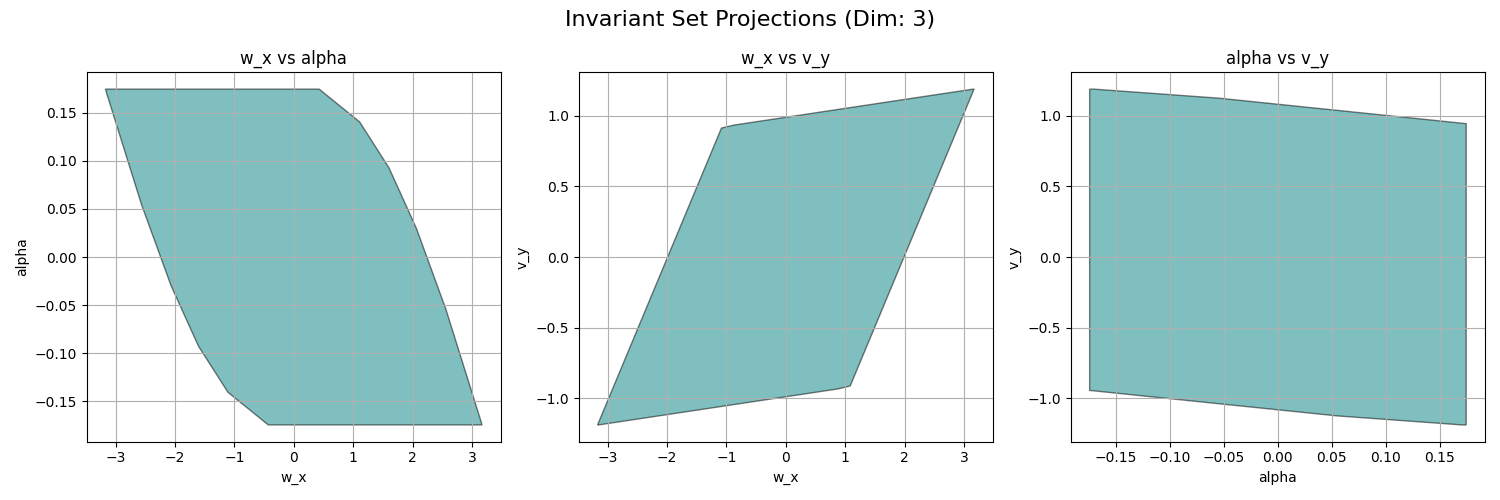


Showing Z Controller Invariant Set:
System is 1D (Vertical). Invariant Set A :  [[ 0.99267249]
 [-0.99267249]
 [-0.9890289 ]
 [ 0.9890289 ]
 [ 1.        ]
 [-1.        ]
 [-0.99632951]
 [ 0.99632951]] 
b :  [10.         10.         13.33333333 26.66666667 10.         10.
 13.33333333 26.66666667]

Showing Roll Controller Invariant Set:


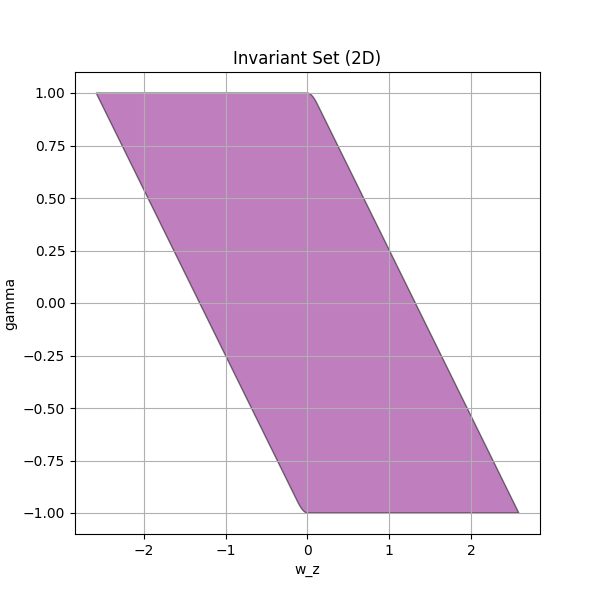

In [5]:
# 1. Subsystem X (Longitudinal)
print("Showing X Controller Invariant Set:")
mpc.mpc_x.plot_all_projections(state_names=['w_y', 'beta', 'v_x'])

# 2. Subsystem Y (Lateral)
print("\nShowing Y Controller Invariant Set:")
# States: Roll Rate, Roll Angle, Y Velocity
mpc.mpc_y.plot_all_projections(state_names=['w_x', 'alpha', 'v_y'])

# 3. Subsystem Z (Vertical)
print("\nShowing Z Controller Invariant Set:")
# State: Z Velocity (1D System)
# This will likely print the bounds [min, max] instead of plotting
if hasattr(mpc, 'mpc_z'):
    mpc.mpc_z.plot_all_projections(state_names=['v_z'])

# 4. Subsystem Roll (Attitude)
print("\nShowing Roll Controller Invariant Set:")
# States: Yaw Rate, Roll/Yaw Angle (Gamma)
if hasattr(mpc, 'mpc_roll'):
    mpc.mpc_roll.plot_all_projections(state_names=['w_z', 'gamma'])